In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

We need the dates to be parsed automatically
so specify that dates need to be in index and dates are automatically parsed.


In [13]:
data = pd.read_csv('Fremont_bridge.csv', index_col = 'Date',parse_dates = True)

In [14]:
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


pass a different column name in the dataset using df.eval()

In [15]:
data.columns=['West','East']
data['Total'] = data.eval('West + East')

In [16]:
data.dropna().describe()

,West,East,Total
count,53271.000000,53271.000000,53271.000000
mean,57.434401,54.368549,111.802951
std,82.795998,71.282743,140.682271
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,29.000000,30.000000,61.000000
75%,70.000000,72.000000,146.000000
max,717.000000,698.000000,957.000000


### Visualize the data

Text(0,0.5,'Hourly bike count')

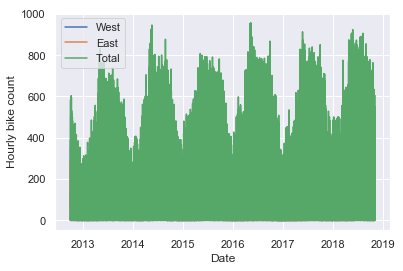

In [17]:
sns.set()
data.plot()
plt.ylabel('Hourly bike count')

resampling for a coarser grid

               West     East    Total
Date                                 
2012-10-07   6995.0   7297.0  14292.0
2012-10-14   8116.0   8679.0  16795.0
2012-10-21   7563.0   7946.0  15509.0
2012-10-28   6536.0   6901.0  13437.0
2012-11-04   5786.0   6408.0  12194.0
2012-11-11   7275.0   7741.0  15016.0
2012-11-18   5799.0   6077.0  11876.0
2012-11-25   3316.0   3534.0   6850.0
2012-12-02   5659.0   5875.0  11534.0
2012-12-09   5488.0   5682.0  11170.0
2012-12-16   5107.0   5384.0  10491.0
2012-12-23   3705.0   3752.0   7457.0
2012-12-30   2492.0   2612.0   5104.0
2013-01-06   4124.0   4315.0   8439.0
2013-01-13   4573.0   4861.0   9434.0
2013-01-20   5258.0   5550.0  10808.0
2013-01-27   4915.0   5096.0  10011.0
2013-02-03   5439.0   5848.0  11287.0
2013-02-10   6253.0   6816.0  13069.0
2013-02-17   5952.0   6438.0  12390.0
2013-02-24   5720.0   6063.0  11783.0
2013-03-03   6507.0   6937.0  13444.0
2013-03-10   7434.0   8161.0  15595.0
2013-03-17   6315.0   6724.0  13039.0
2013-03-24  

Text(0,0.5,'weekly bike count')

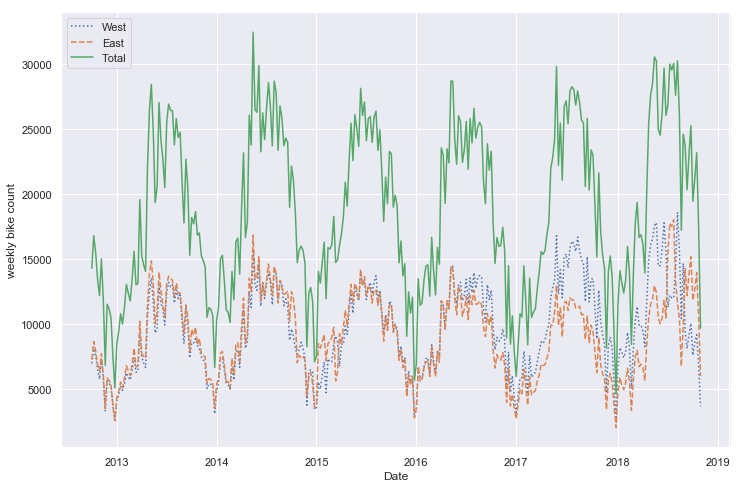

In [18]:
#resample for weekly
weekly = data.resample('W').sum()
print(weekly)
weekly.plot(style=[':','--','-'],figsize=(12,8))
plt.ylabel('weekly bike count')

resampling for daily time frame
and then take a rolling mean

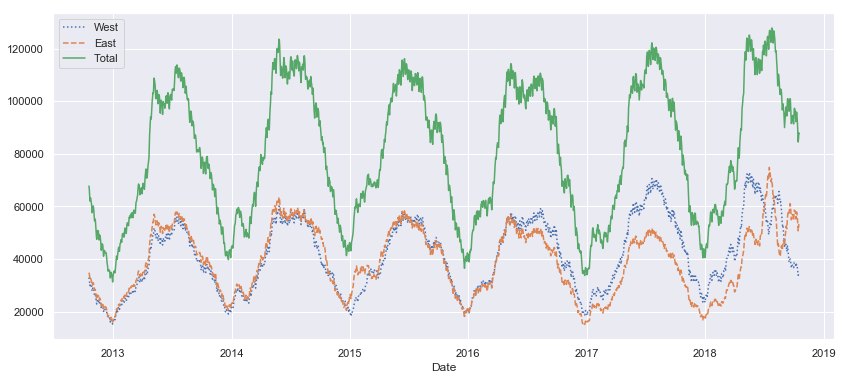

In [19]:
#resampling for daily 
daily = data.resample('D').sum()
daily.rolling(30,center = True).sum().plot(style=[':','--','-'],figsize=(14,6))


Text(0,0.5,'weekly bicycle count')

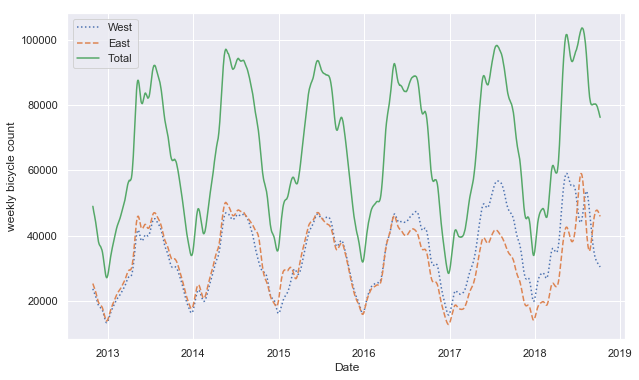

In [20]:
#for a smoother rolling mean using a window function 
#for 50 days and the width of the gaussian window within is 10 days
daily.rolling(50,center=True,win_type='gaussian').sum(std=10).plot(style=[':','--','-'],figsize=(10,6))
plt.ylabel('weekly bicycle count')

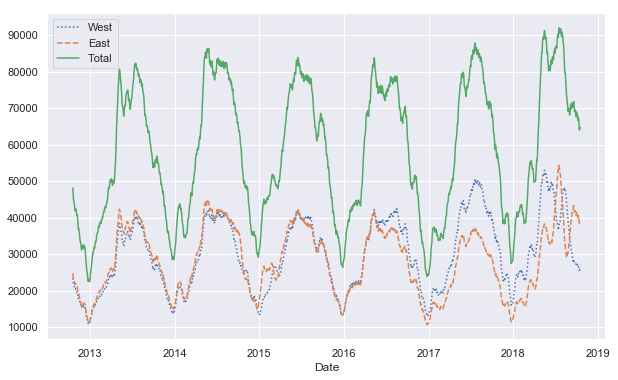

In [21]:
#sampling for 30 days
daily.rolling(30,center=True,win_type='gaussian').sum(std=10).plot(style=[':','--','-'],figsize=(10,6))

# digging further 


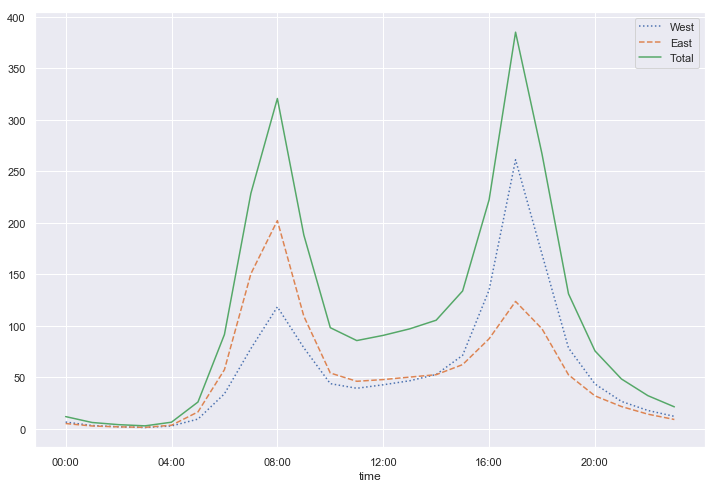

In [22]:
by_time = data.groupby(data.index.time).mean()#pick up time and 
#average it
hourly_ticks = 4*60*60*np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':','--','-'],figsize=(12,8))

we see peaks at 8AM and 5PM.traffic for the western peaks in the morning and for the eastern peaks at evening.Which makes sense for commuters.

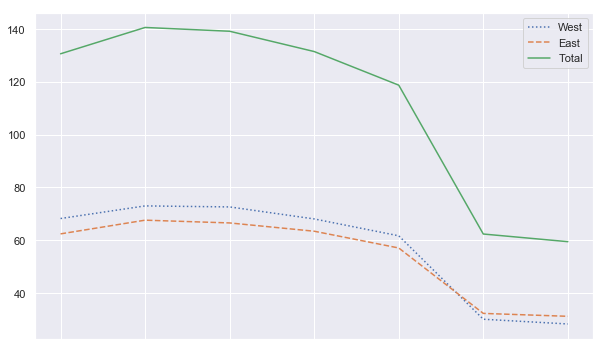

In [23]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon','Tue','Wed','Thurs','Fri','Sat','Sun']
by_weekday.plot(style=[':','--','-'],figsize=(10,6))

In [24]:
weekend = np.where(data.index.weekday < 5, 'Weekday','Weekend')
by_time = data.groupby([weekend,data.index.time]).mean()

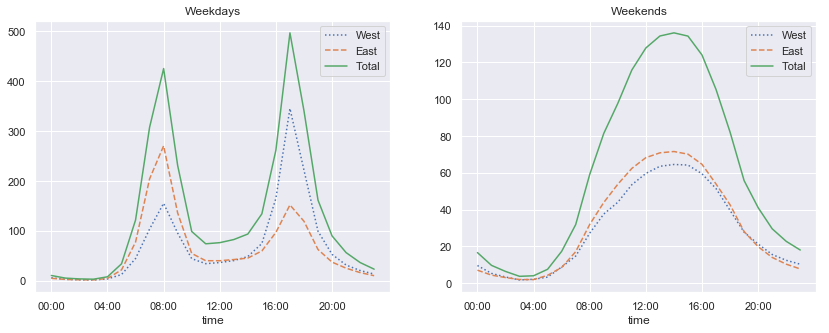

In [25]:
fig,ax = plt.subplots(1,2, figsize=(14,5))
by_time.loc['Weekday'].plot(ax=ax[0],title='Weekdays',xticks=hourly_ticks, style=[':','--','-'])
by_time.loc['Weekend'].plot(ax=ax[1],title='Weekends',xticks=hourly_ticks, style=[':','--','-'])

there a bimodal distribution pattern during the work days and a unimodal distribution during the weekends